In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import pycountry

path = os.getcwd()
parent_path = os.path.abspath(os.path.join(path, os.pardir))

In [2]:
df = pd.read_csv(os.path.abspath(parent_path + '/data/UNHCR.csv'))

In [3]:
df.head(20)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection
0,1979,Chile,CHL,Algeria,DZA,2000,0,0,-
1,1979,Western Sahara,ESH,Algeria,DZA,50000,0,0,-
2,1979,Dem. Rep. of the Congo,COD,Angola,AGO,30000,0,0,-
3,1979,Namibia,NAM,Angola,AGO,35000,0,0,-
4,1979,South Africa,ZAF,Angola,AGO,1000,0,0,-
5,1979,Armenia,ARM,Egypt,EGY,400,0,0,-
6,1979,Ethiopia,ETH,Egypt,EGY,720,0,0,-
7,1979,Türkiye,TUR,Egypt,EGY,60,0,0,-
8,1979,Unknown,NaN,Egypt,EGY,3670,0,0,-
9,1979,Unknown,NaN,Argentina,ARG,27050,0,0,-


In [4]:
df.loc[df['Country of origin (ISO)'] == "MDV"]

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection
32341,2004,Maldives,MDV,Sri Lanka,LKA,0,5,0,-
35188,2005,Maldives,MDV,United Kingdom of Great Britain and Northern I...,GBR,5,0,0,-
37046,2005,Maldives,MDV,Switzerland,CHE,5,0,0,-
38854,2006,Maldives,MDV,United Kingdom of Great Britain and Northern I...,GBR,5,0,0,-
40781,2006,Maldives,MDV,Switzerland,CHE,5,0,0,-
...,...,...,...,...,...,...,...,...,...
112846,2022,Maldives,MDV,United Kingdom of Great Britain and Northern I...,GBR,44,0,0,-
113465,2022,Maldives,MDV,India,IND,5,0,0,-
114117,2022,Maldives,MDV,Sri Lanka,LKA,0,5,0,-
114959,2022,Maldives,MDV,New Zealand,NZL,5,0,0,-


In [4]:
df['Other people in need of international protection'] = pd.to_numeric(df['Other people in need of international protection'], errors='coerce')

In [5]:
df['Total'] = df.iloc[:, 5:9].sum(axis=1)

In [6]:
df['Other people in need of international protection'] = df['Other people in need of international protection'].fillna(0) 

/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


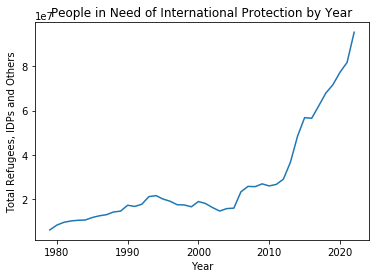

In [7]:
df['Total_Year'] = df.groupby('Year')["Total"].transform(sum)
plt.plot(df.Year, df.Total_Year)
plt.title('People in Need of International Protection by Year')
plt.xlabel('Year')
plt.ylabel('Total Refugees, IDPs and Others')
plt.show()

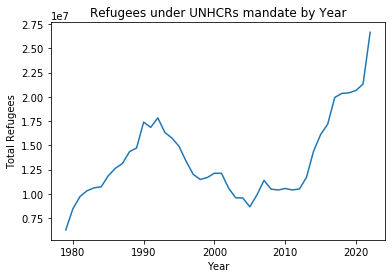

In [8]:
df['Refugees_Year'] = df.groupby('Year')["Refugees under UNHCR's mandate"].transform(sum)
plt.plot(df.Year, df.Refugees_Year)
plt.title('Refugees under UNHCRs mandate by Year')
plt.xlabel('Year')
plt.ylabel('Total Refugees')
plt.show()

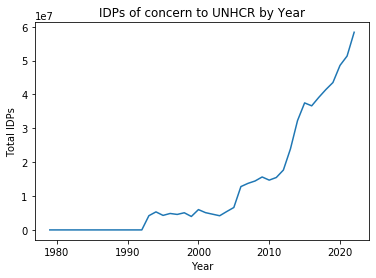

In [9]:
df['IDPs_Year'] = df.groupby('Year')["IDPs of concern to UNHCR"].transform(sum)
plt.plot(df.Year, df.IDPs_Year)
plt.title('IDPs of concern to UNHCR by Year')
plt.xlabel('Year')
plt.ylabel('Total IDPs')
plt.show()

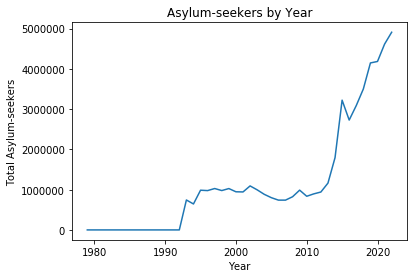

In [10]:
df['Asylum_Year'] = df.groupby('Year')["Asylum-seekers"].transform(sum)
plt.plot(df.Year, df.Asylum_Year)
plt.title('Asylum-seekers by Year')
plt.xlabel('Year')
plt.ylabel('Total Asylum-seekers')
plt.show()

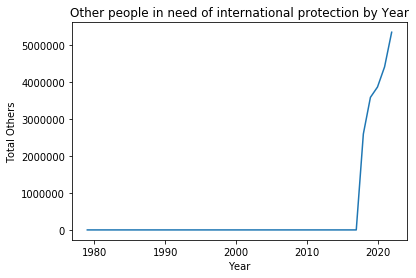

In [11]:
df['Others_Year'] = df.groupby('Year')["Other people in need of international protection"].transform(sum)
plt.plot(df.Year, df.Others_Year)
plt.title('Other people in need of international protection by Year')
plt.xlabel('Year')
plt.ylabel('Total Others')
plt.show()

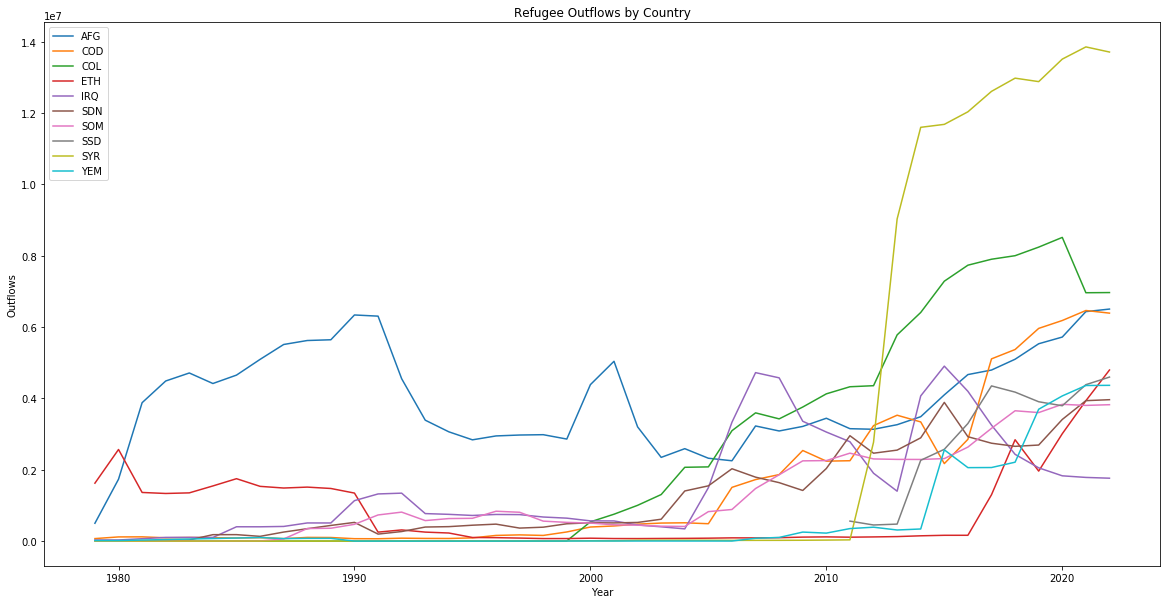

In [12]:
# Select the top 10 countries by outflows
top10_countries = df.groupby('Country of origin (ISO)')['Total'].sum().nlargest(10).index

# Filter the data to include only the top 10 countries
filtered_data = df[df['Country of origin (ISO)'].isin(top10_countries)]

# Group the filtered data by country and reset the index
grouped_data = filtered_data.groupby(['Country of origin (ISO)', 'Year']).sum().reset_index()

# Plot the outflows over time for each country
plt.figure(figsize=(20, 10))

for name, group in grouped_data.groupby('Country of origin (ISO)'):
    plt.plot(group['Year'], group['Total'], label=name)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Outflows')
plt.title('Refugee Outflows by Country')
plt.legend()

plt.show()

In [13]:
df.loc[df['Country of origin (ISO)'] == 'SYR'].groupby('Year')['Total'].sum()

Year
1979         500.0
1980         500.0
1981         505.0
1982         505.0
1983         526.0
1984         529.0
1985        2599.0
1986         534.0
1987          20.0
1988         881.0
1989         397.0
1990        2148.0
1991        3037.0
1992        4408.0
1993        5412.0
1994        7087.0
1995        7995.0
1996        8611.0
1997        8653.0
1998        8132.0
1999        6693.0
2000        9598.0
2001        8714.0
2002       23172.0
2003       24364.0
2004       25211.0
2005       23387.0
2006       19820.0
2007       20533.0
2008       21184.0
2009       23474.0
2010       28190.0
2011       34372.0
2012     2771527.0
2013     9030142.0
2014    11599639.0
2015    11682555.0
2016    12034826.0
2017    12607682.0
2018    12977870.0
2019    12880693.0
2020    13511967.0
2021    13853927.0
2022    13710262.0
Name: Total, dtype: float64

In [14]:
df.loc[df['Country of origin (ISO)'] == 'COL'].groupby('Year')['Total'].sum()

Year
1981         50.0
1982        100.0
1985         60.0
1986         50.0
1987         50.0
1988         35.0
1989         65.0
1990        493.0
1991        738.0
1992        841.0
1993       1040.0
1994       1361.0
1995       1902.0
1996       2168.0
1997       2376.0
1998       3536.0
1999       4412.0
2000     539281.0
2001     753404.0
2002    1002544.0
2003    1305002.0
2004    2068905.0
2005    2080191.0
2006    3094707.0
2007    3594838.0
2008    3426152.0
2009    3758067.0
2010    4127969.0
2011    4326845.0
2012    4356256.0
2013    5780487.0
2014    6409155.0
2015    7286062.0
2016    7734456.0
2017    7901722.0
2018    8000730.0
2019    8241214.0
2020    8513571.0
2021    6962499.0
2022    6967178.0
Name: Total, dtype: float64

In [15]:
df.loc[df['Country of origin (ISO)'] == 'IRQ'].groupby('Year')['Total'].sum()

Year
1979      31000.0
1980      31098.0
1981      66589.0
1982     103766.0
1983     103721.0
1984     101724.0
1985     401503.0
1986     400745.0
1987     410818.0
1988     508468.0
1989     507986.0
1990    1133805.0
1991    1321853.0
1992    1343824.0
1993     771074.0
1994     749833.0
1995     718717.0
1996     746727.0
1997     742397.0
1998     675030.0
1999     642875.0
2000     566795.0
2001     565334.0
2002     452145.0
2003     400168.0
2004     342508.0
2005    1496740.0
2006    3332570.0
2007    4722778.0
2008    4576421.0
2009    3359590.0
2010    3057083.0
2011    2785173.0
2012    1902253.0
2013    1398734.0
2014    4070040.0
2015    4904541.0
2016    4198708.0
2017    3251151.0
2018    2431880.0
2019    2053637.0
2020    1829875.0
2021    1784909.0
2022    1763007.0
Name: Total, dtype: float64

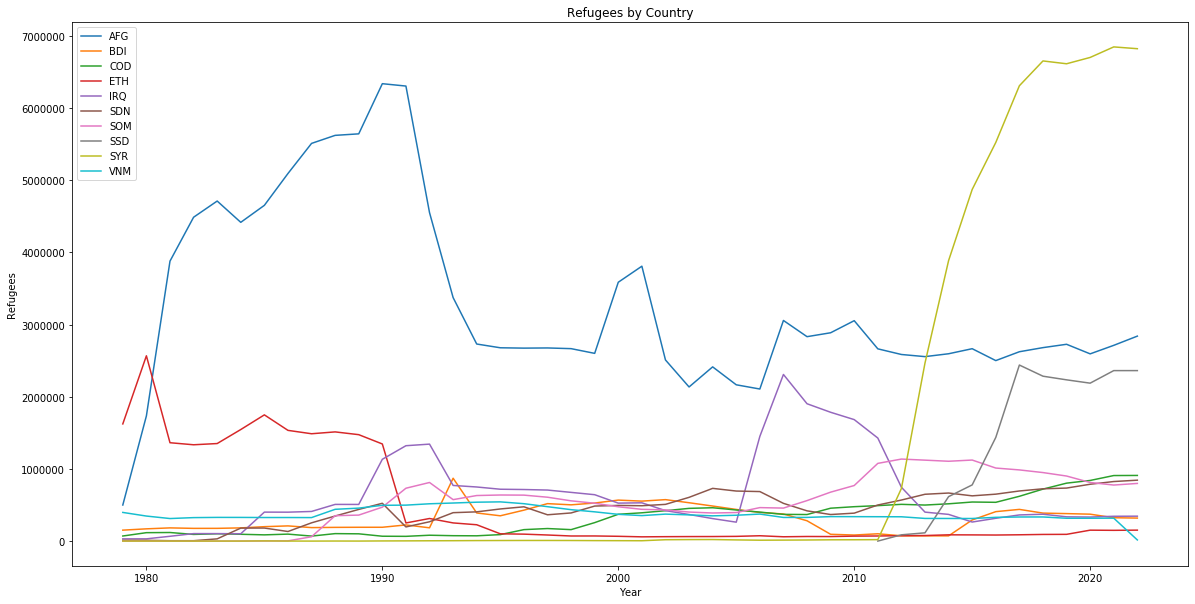

In [18]:
# Select the top 10 countries by outflows
top10_countries = df.groupby('Country of origin (ISO)')["Refugees under UNHCR's mandate"].sum().nlargest(10).index

# Filter the data to include only the top 10 countries
filtered_data = df[df['Country of origin (ISO)'].isin(top10_countries)]

# Group the filtered data by country and reset the index
grouped_data = filtered_data.groupby(['Country of origin (ISO)', 'Year']).sum().reset_index()

# Plot the outflows over time for each country
plt.figure(figsize=(20, 10))

for name, group in grouped_data.groupby('Country of origin (ISO)'):
    plt.plot(group['Year'], group["Refugees under UNHCR's mandate"], label=name)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Refugees')
plt.title('Refugees by Country')
plt.legend()

plt.show()

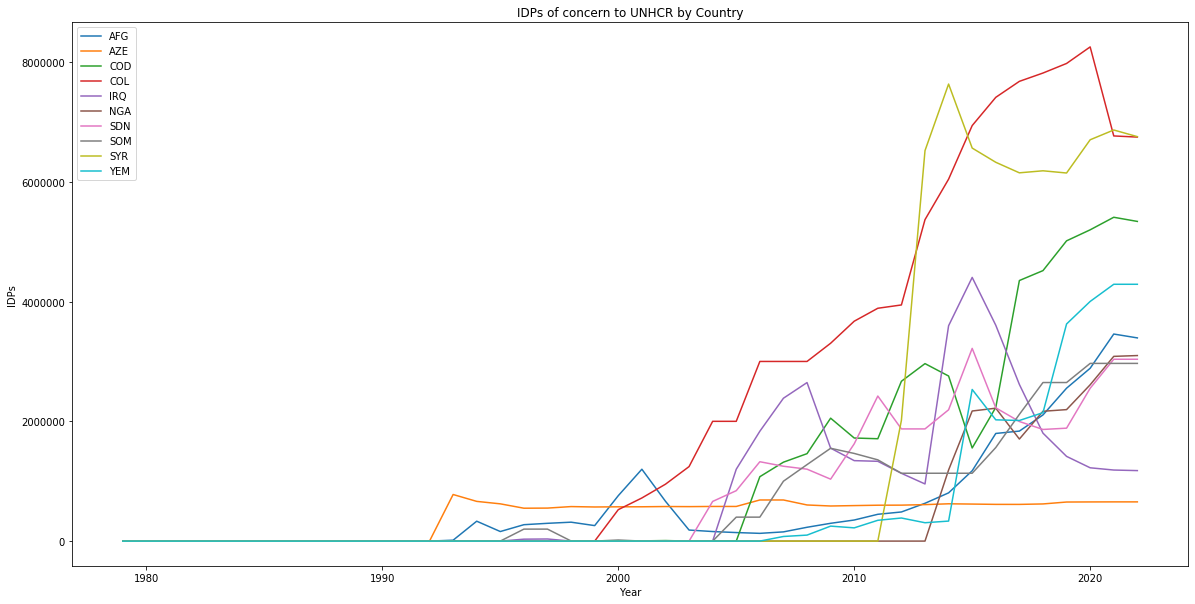

In [19]:
# Select the top 10 countries by outflows
top10_countries = df.groupby('Country of origin (ISO)')["IDPs of concern to UNHCR"].sum().nlargest(10).index

# Filter the data to include only the top 10 countries
filtered_data = df[df['Country of origin (ISO)'].isin(top10_countries)]

# Group the filtered data by country and reset the index
grouped_data = filtered_data.groupby(['Country of origin (ISO)', 'Year']).sum().reset_index()

# Plot the outflows over time for each country
plt.figure(figsize=(20, 10))

for name, group in grouped_data.groupby('Country of origin (ISO)'):
    plt.plot(group['Year'], group["IDPs of concern to UNHCR"], label=name)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('IDPs')
plt.title('IDPs of concern to UNHCR by Country')
plt.legend()

plt.show()

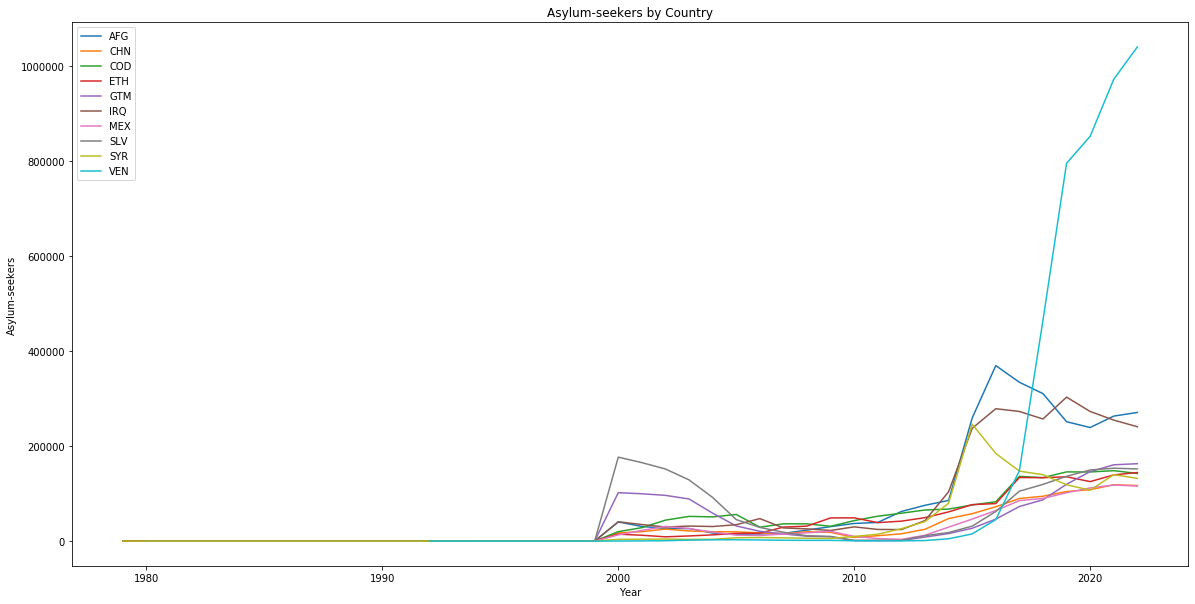

In [20]:
# Select the top 10 countries by outflows
top10_countries = df.groupby('Country of origin (ISO)')["Asylum-seekers"].sum().nlargest(10).index

# Filter the data to include only the top 10 countries
filtered_data = df[df['Country of origin (ISO)'].isin(top10_countries)]

# Group the filtered data by country and reset the index
grouped_data = filtered_data.groupby(['Country of origin (ISO)', 'Year']).sum().reset_index()

# Plot the outflows over time for each country
plt.figure(figsize=(20, 10))

for name, group in grouped_data.groupby('Country of origin (ISO)'):
    plt.plot(group['Year'], group["Asylum-seekers"], label=name)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Asylum-seekers')
plt.title('Asylum-seekers by Country')
plt.legend()

plt.show()

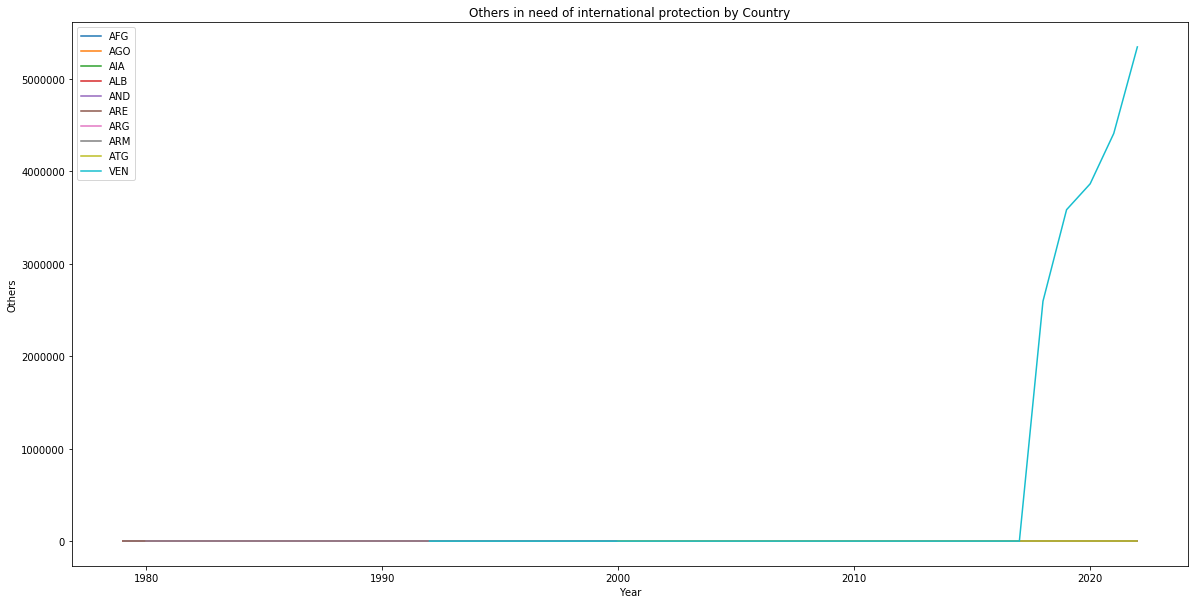

In [21]:
# Select the top 10 countries by outflows
top10_countries = df.groupby('Country of origin (ISO)')["Other people in need of international protection"].sum().nlargest(10).index

# Filter the data to include only the top 10 countries
filtered_data = df[df['Country of origin (ISO)'].isin(top10_countries)]

# Group the filtered data by country and reset the index
grouped_data = filtered_data.groupby(['Country of origin (ISO)', 'Year']).sum().reset_index()

# Plot the outflows over time for each country
plt.figure(figsize=(20, 10))

for name, group in grouped_data.groupby('Country of origin (ISO)'):
    plt.plot(group['Year'], group["Other people in need of international protection"], label=name)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Others')
plt.title('Others in need of international protection by Country')
plt.legend()

plt.show()

In [22]:
df.loc[df['Country of origin (ISO)'] == 'SLV']

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Total,Total_Year,Refugees_Year,IDPs_Year,Asylum_Year,Others_Year
180,1980,El Salvador,SLV,Belize,BLZ,4000,0,0,0.0,4000.0,8454917.0,8454917,0,0,0.0
197,1980,El Salvador,SLV,Costa Rica,CRI,7500,0,0,0.0,7500.0,8454917.0,8454917,0,0,0.0
212,1980,El Salvador,SLV,Guatemala,GTM,4130,0,0,0.0,4130.0,8454917.0,8454917,0,0,0.0
214,1980,El Salvador,SLV,Honduras,HND,25000,0,0,0.0,25000.0,8454917.0,8454917,0,0,0.0
269,1980,El Salvador,SLV,Mexico,MEX,44000,0,0,0.0,44000.0,8454917.0,8454917,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115698,2022,El Salvador,SLV,Spain,ESP,992,3980,0,0.0,4972.0,95269695.0,26664700,58352037,4910889,5342069.0
115955,2022,El Salvador,SLV,Sweden,SWE,139,77,0,0.0,216.0,95269695.0,26664700,58352037,4910889,5342069.0
116055,2022,El Salvador,SLV,Switzerland,CHE,9,0,0,0.0,9.0,95269695.0,26664700,58352037,4910889,5342069.0
116368,2022,El Salvador,SLV,Uruguay,URY,48,8,0,0.0,56.0,95269695.0,26664700,58352037,4910889,5342069.0


### Merging with the UCDP Data

In [31]:
ucdp = pd.read_csv(parent_path + '/data/ucdp_grouped.csv')

In [32]:
ucdp_country = ucdp.groupby(['year', 'country']).agg(
    deaths = ('best', 'sum'),
    state_deaths = ('best_state','sum'),
    nonstate_deaths = ('best_nonstate','sum'),
    onesided_deaths = ('best_onesided','sum'),
    civilian_deaths = ('deaths_civilians','sum')).reset_index()

ucdp_country.head(10)

,year,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,1989,Afghanistan,5292,5055.0,237.0,0.0,303
1,1989,Angola,2349,2309.0,0.0,40.0,221
2,1989,Bangladesh,81,26.0,1.0,54.0,54
3,1989,Cambodia (Kampuchea),629,629.0,0.0,0.0,15
4,1989,Chad,50,50.0,0.0,0.0,0
5,1989,China,2600,0.0,0.0,2600.0,2600
6,1989,Colombia,384,238.0,0.0,146.0,150
7,1989,Comoros,29,29.0,0.0,0.0,0
8,1989,DR Congo (Zaire),28,0.0,0.0,28.0,28
9,1989,Djibouti,6,6.0,0.0,0.0,0


In [33]:
unhcr_country = df.groupby(['Year', 'Country of origin']).agg(
    Total = ('Total','sum'),
    Refugees = ("Refugees under UNHCR's mandate",'sum'),
    Asylum = ('Asylum-seekers','sum'),
    IDPs = ('IDPs of concern to UNHCR','sum'),
    Others = ('Other people in need of international protection','sum')).reset_index()

unhcr_country.head(10)

,Year,Country of origin,Total,Refugees,Asylum,IDPs,Others
0,1979,Afghanistan,500000.0,500000,0,0,0.0
1,1979,Albania,1610.0,1610,0,0,0.0
2,1979,Angola,652980.0,652980,0,0,0.0
3,1979,Armenia,700.0,700,0,0,0.0
4,1979,Benin,200.0,200,0,0,0.0
5,1979,Burundi,151680.0,151680,0,0,0.0
6,1979,Cambodia,51100.0,51100,0,0,0.0
7,1979,Chad,10000.0,10000,0,0,0.0
8,1979,Chile,3130.0,3130,0,0,0.0
9,1979,Cuba,3560.0,3560,0,0,0.0


In [34]:
# Doing a left join because if there is no conflict in a country in a given year, it will be missing from UCDP data
merged_df = pd.merge(unhcr_country, ucdp_country, left_on=['Year', 'Country of origin'], right_on=['year', 'country'], how='left').drop(columns=['year', 'country'])

# Dropping observations prior to the beginning of the UCDP dataset
merged_df = merged_df[merged_df['Year'] >= ucdp_country.year.min()]


In [35]:
merged_df.head(20)

,Year,Country of origin,Total,Refugees,Asylum,IDPs,Others,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
623,1989,Afghanistan,5643989.0,5643989,0,0,0.0,5292.0,5055.0,237.0,0.0,303.0
624,1989,Albania,367.0,367,0,0,0.0,NaN,NaN,NaN,NaN,NaN
625,1989,Algeria,5.0,5,0,0,0.0,NaN,NaN,NaN,NaN,NaN
626,1989,Angola,408692.0,408692,0,0,0.0,2349.0,2309.0,0.0,40.0,221.0
627,1989,Argentina,103.0,103,0,0,0.0,NaN,NaN,NaN,NaN,NaN
628,1989,Bangladesh,5.0,5,0,0,0.0,81.0,26.0,1.0,54.0,54.0
629,1989,Benin,60.0,60,0,0,0.0,NaN,NaN,NaN,NaN,NaN
630,1989,Bolivia (Plurinational State of),26.0,26,0,0,0.0,NaN,NaN,NaN,NaN,NaN
631,1989,Botswana,5.0,5,0,0,0.0,NaN,NaN,NaN,NaN,NaN
632,1989,Brazil,6.0,6,0,0,0.0,NaN,NaN,NaN,NaN,NaN


In [36]:
# Not a perfect match because we have minor differences in names

print(ucdp_country.loc[ucdp_country['country'] == 'Bolivia']) # Bolivia (Plurinational State of) in UNHCR

print(ucdp_country.loc[ucdp_country['country'] == 'Central African Republic']) # Central African Rep. in UNHCR

      year  country  deaths  state_deaths  nonstate_deaths  onesided_deaths  \
526   1998  Bolivia       2           0.0              2.0              0.0   
647   2000  Bolivia      38           0.0             38.0              0.0   
1735  2021  Bolivia       1           0.0              1.0              0.0   

      civilian_deaths  
526                 0  
647                 0  
1735                0  
      year                   country  deaths  state_deaths  nonstate_deaths  \
119   1991  Central African Republic       0           0.0              0.0   
176   1992  Central African Republic       3           0.0              0.0   
241   1993  Central African Republic       4           0.0              0.0   
591   1999  Central African Republic       5           0.0              0.0   
708   2001  Central African Republic     203         195.0              0.0   
758   2002  Central African Republic     148         131.0              0.0   
808   2003  Central African Republ

In [37]:
# Replacing NaN in the UCDP columns with 0
merged_df[['deaths','state_deaths', 'nonstate_deaths', 'onesided_deaths', 'civilian_deaths']] = merged_df[['deaths','state_deaths', 'nonstate_deaths', 'onesided_deaths', 'civilian_deaths']].fillna(0)


In [38]:
# Checking correlations between refugee flows and conflicts

print(merged_df['Total'].corr(merged_df['deaths']), merged_df['Total'].corr(merged_df['state_deaths']), 
      merged_df['Total'].corr(merged_df['nonstate_deaths']), merged_df['Total'].corr(merged_df['onesided_deaths']),
      merged_df['Total'].corr(merged_df['civilian_deaths']))

# 14.7% for total deaths and total flows
# 45.5% for state deaths and total flows
# 1.8% for non-state deaths and total flows
# 5.5% for one-sided deaths and total flows
# 7.1% for civilian deaths and total flows

print(merged_df['Refugees'].corr(merged_df['deaths']), merged_df['Refugees'].corr(merged_df['state_deaths']), 
      merged_df['Refugees'].corr(merged_df['nonstate_deaths']), merged_df['Refugees'].corr(merged_df['onesided_deaths']),
      merged_df['Refugees'].corr(merged_df['civilian_deaths']))

# 19.9% for total deaths and refugees flows
# 49.0% for state deaths and refugees flows
# 0.7% for non-state deaths and refugees flows
# 10.1% for one-sided deaths and refugees flows
# 11.6% for civilian deaths and refugees flows

print(merged_df['Asylum'].corr(merged_df['deaths']), merged_df['Asylum'].corr(merged_df['state_deaths']), 
      merged_df['Asylum'].corr(merged_df['nonstate_deaths']), merged_df['Asylum'].corr(merged_df['onesided_deaths']),
      merged_df['Asylum'].corr(merged_df['civilian_deaths']))

# 7.9% for total deaths and asylum flows
# 36.5% for state deaths and asylum flows
# 16.9% for non-state deaths and asylum flows
# -0.5% for one-sided deaths and asylum flows
# 0.1% for civilian deaths and asylum flows

print(merged_df['IDPs'].corr(merged_df['deaths']), merged_df['IDPs'].corr(merged_df['state_deaths']), 
      merged_df['IDPs'].corr(merged_df['nonstate_deaths']), merged_df['IDPs'].corr(merged_df['onesided_deaths']),
      merged_df['IDPs'].corr(merged_df['civilian_deaths']))

# 6.4% for total deaths and IDPs flows
# 27.7% for state deaths and IDPs flows
# 1.3% for non-state deaths and IDPs flows
# 0.7% for one-sided deaths and IDPs flows
# 1.8% for civilian deaths and IDPs flows

0.11426402417963091 0.33759996974096457 0.04142902809177449 0.04295424198680297 0.05429084031259881
0.1552899695850214 0.37647009466225556 0.030518796523292244 0.07755522994541261 0.08906627409904205
0.03253723028836185 0.13799460757596677 0.06752289316685102 -0.00020581012607525065 0.0023758320391187664
0.062238890626403656 0.23861760384055192 0.03636250297305622 0.010860776281094773 0.019852751719087958


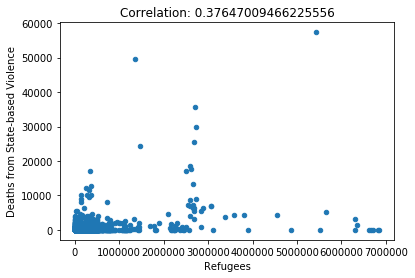

In [39]:
correlation = merged_df['Refugees'].corr(merged_df['state_deaths'])

# Create a scatter plot
merged_df.plot.scatter(x='Refugees', y='state_deaths')

# Add a title and labels to the plot
plt.title('Correlation: {}'.format(correlation))
plt.xlabel('Refugees')
plt.ylabel('Deaths from State-based Violence')

# Display the plot
plt.show()


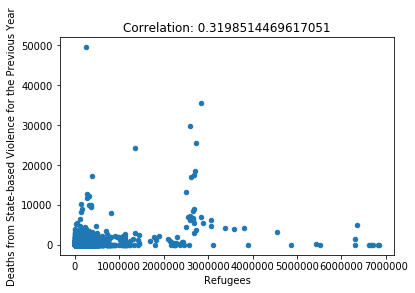

In [40]:
# Create a lag variable for 'Refugees' with a shift of 1 -> means we get the refugee values for the previous year
merged_df = merged_df.sort_values(by=['Country of origin', 'Year'])

#merged_df['Refugees_Lag'] = merged_df['Refugees'].shift(1)
merged_df['Refugees_Lag'] = merged_df.groupby('Country of origin')['Refugees'].shift(1)

# Create a lag variable for 'state_deaths' with a shift of 1 -> means we get the death values for the previous year

#merged_df['state_deaths_Lag'] = merged_df['state_deaths'].shift(1)
merged_df['state_deaths_Lag'] = merged_df.groupby('Country of origin')['state_deaths'].shift(1)

# Correlation between current refugee counts and conflict for the previous year
correlation = merged_df['Refugees'].corr(merged_df['state_deaths_Lag'])

# Create a scatter plot
merged_df.plot.scatter(x='Refugees', y='state_deaths_Lag')

# Add a title and labels to the plot
plt.title('Correlation: {}'.format(correlation))
plt.xlabel('Refugees')
plt.ylabel('Deaths from State-based Violence for the Previous Year')

# Display the plot
plt.show()


### Correlation within Countries

In [41]:
within_country_ref_state = merged_df.groupby('Country of origin')['Refugees', 'state_deaths'].corr().iloc[0::2, -1]

np.mean(within_country_ref_state)
within_country_ref_state.max()
within_country_ref_state.min()

print("Average within-country correlation:", np.mean(within_country_ref_state))
print("Country with the minimum correlation:", within_country_ref_state.idxmax())
print("Country with the maximum correlation:", within_country_ref_state.idxmin())

within_country_ref_state.head(10)

Average within-country correlation: 0.1574922078975577
Country with the minimum correlation: ('Ukraine', 'Refugees')
Country with the maximum correlation: ('Peru', 'Refugees')


/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Country of origin            
Afghanistan          Refugees   -0.212490
Albania              Refugees   -0.138063
Algeria              Refugees    0.183931
Andorra              Refugees         NaN
Angola               Refugees    0.353837
Anguilla             Refugees         NaN
Antigua and Barbuda  Refugees         NaN
Argentina            Refugees         NaN
Armenia              Refugees    0.396364
Australia            Refugees   -0.198638
Name: state_deaths, dtype: float64

In [42]:
within_country_tot_death = merged_df.groupby('Country of origin')['Total', 'deaths'].corr().iloc[0::2, -1]

np.mean(within_country_tot_death)
within_country_tot_death.max()
within_country_tot_death.min()

print("Average within-country correlation:", np.mean(within_country_tot_death))
print("Country with the minimum correlation:", within_country_tot_death.idxmax())
print("Country with the maximum correlation:", within_country_tot_death.idxmin())

within_country_tot_death.head(10)

Average within-country correlation: 0.1754327224281813
Country with the minimum correlation: ('Burkina Faso', 'Total')
Country with the maximum correlation: ('Peru', 'Total')


/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Country of origin         
Afghanistan          Total    0.441421
Albania              Total   -0.147892
Algeria              Total   -0.107510
Andorra              Total         NaN
Angola               Total    0.417664
Anguilla             Total         NaN
Antigua and Barbuda  Total         NaN
Argentina            Total   -0.095706
Armenia              Total    0.330281
Australia            Total   -0.091228
Name: deaths, dtype: float64

In [43]:
within_country_tot_state = merged_df.groupby('Country of origin')['Total', 'state_deaths'].corr().iloc[0::2, -1]

np.mean(within_country_tot_state)
within_country_tot_state.max()
within_country_tot_state.min()

print("Average within-country correlation:", np.mean(within_country_tot_state))
print("Country with the minimum correlation:", within_country_tot_state.idxmax())
print("Country with the maximum correlation:", within_country_tot_state.idxmin())

within_country_tot_state.head(10)

Average within-country correlation: 0.16055579874952625
Country with the minimum correlation: ('Ukraine', 'Total')
Country with the maximum correlation: ('Peru', 'Total')


/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Country of origin         
Afghanistan          Total    0.453894
Albania              Total   -0.147892
Algeria              Total   -0.118701
Andorra              Total         NaN
Angola               Total    0.380557
Anguilla             Total         NaN
Antigua and Barbuda  Total         NaN
Argentina            Total         NaN
Armenia              Total    0.341402
Australia            Total   -0.091228
Name: state_deaths, dtype: float64

In [44]:
within_country_ref_state = merged_df.groupby('Country of origin')['Refugees_Lag', 'state_deaths'].corr().iloc[0::2, -1]

np.mean(within_country_ref_state)
within_country_ref_state.max()
within_country_ref_state.min()

print("Average within-country correlation:", np.mean(within_country_ref_state))
print("Country with the minimum correlation:", within_country_ref_state.idxmax())
print("Country with the maximum correlation:", within_country_ref_state.idxmin())

within_country_ref_state.head(10)

Average within-country correlation: 0.09889980251809052
Country with the minimum correlation: ('Burkina Faso', 'Refugees_Lag')
Country with the maximum correlation: ('Peru', 'Refugees_Lag')


/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Country of origin                
Afghanistan          Refugees_Lag   -0.245993
Albania              Refugees_Lag   -0.171656
Algeria              Refugees_Lag    0.208772
Andorra              Refugees_Lag         NaN
Angola               Refugees_Lag    0.296611
Anguilla             Refugees_Lag         NaN
Antigua and Barbuda  Refugees_Lag         NaN
Argentina            Refugees_Lag         NaN
Armenia              Refugees_Lag    0.249312
Australia            Refugees_Lag   -0.194171
Name: state_deaths, dtype: float64

In [45]:
merged_df['Total_Lag'] = merged_df.groupby('Country of origin')['Total'].shift(1)

within_country_tot_death = merged_df.groupby('Country of origin')['Total_Lag', 'deaths'].corr().iloc[0::2, -1]

np.mean(within_country_tot_death)
within_country_tot_death.max()
within_country_tot_death.min()

print("Average within-country correlation:", np.mean(within_country_tot_death))
print("Country with the minimum correlation:", within_country_tot_death.idxmax())
print("Country with the maximum correlation:", within_country_tot_death.idxmin())

within_country_tot_death.head(10)

Average within-country correlation: 0.09574202130961187
Country with the minimum correlation: ('South Africa', 'Total_Lag')
Country with the maximum correlation: ('Peru', 'Total_Lag')


/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Country of origin             
Afghanistan          Total_Lag    0.302946
Albania              Total_Lag   -0.159911
Algeria              Total_Lag   -0.118017
Andorra              Total_Lag         NaN
Angola               Total_Lag    0.246766
Anguilla             Total_Lag         NaN
Antigua and Barbuda  Total_Lag         NaN
Argentina            Total_Lag   -0.193592
Armenia              Total_Lag    0.225896
Australia            Total_Lag   -0.178314
Name: deaths, dtype: float64

In [46]:
within_country_tot_state = merged_df.groupby('Country of origin')['Total_Lag', 'state_deaths'].corr().iloc[0::2, -1]

np.mean(within_country_tot_state)
within_country_tot_state.max()
within_country_tot_state.min()

print("Average within-country correlation:", np.mean(within_country_tot_state))
print("Country with the minimum correlation:", within_country_tot_state.idxmax())
print("Country with the maximum correlation:", within_country_tot_state.idxmin())

within_country_tot_state.head(10)

Average within-country correlation: 0.0958011156794794
Country with the minimum correlation: ('Burkina Faso', 'Total_Lag')
Country with the maximum correlation: ('Peru', 'Total_Lag')


/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Country of origin             
Afghanistan          Total_Lag    0.315861
Albania              Total_Lag   -0.159911
Algeria              Total_Lag   -0.104021
Andorra              Total_Lag         NaN
Angola               Total_Lag    0.211687
Anguilla             Total_Lag         NaN
Antigua and Barbuda  Total_Lag         NaN
Argentina            Total_Lag         NaN
Armenia              Total_Lag    0.259602
Australia            Total_Lag   -0.178314
Name: state_deaths, dtype: float64

In [47]:
within_country_ref_state = merged_df.groupby('Country of origin')['Refugees', 'state_deaths_Lag'].corr().iloc[0::2, -1]

np.mean(within_country_ref_state)
within_country_ref_state.max()
within_country_ref_state.min()

print("Average within-country correlation:", np.mean(within_country_ref_state))
print("Country with the minimum correlation:", within_country_ref_state.idxmax())
print("Country with the maximum correlation:", within_country_ref_state.idxmin())

within_country_ref_state.head(10)


Average within-country correlation: 0.15575388314347677
Country with the minimum correlation: ('Burkina Faso', 'Refugees')
Country with the maximum correlation: ('Peru', 'Refugees')


/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Country of origin            
Afghanistan          Refugees   -0.173477
Albania              Refugees   -0.139098
Algeria              Refugees    0.112097
Andorra              Refugees         NaN
Angola               Refugees    0.332666
Anguilla             Refugees         NaN
Antigua and Barbuda  Refugees         NaN
Argentina            Refugees         NaN
Armenia              Refugees    0.452145
Australia            Refugees   -0.072409
Name: state_deaths_Lag, dtype: float64

In [48]:
merged_df['deaths_Lag'] = merged_df.groupby('Country of origin')['deaths'].shift(1)

within_country_tot_death = merged_df.groupby('Country of origin')['Total', 'deaths_Lag'].corr().iloc[0::2, -1]

np.mean(within_country_tot_death)
within_country_tot_death.max()
within_country_tot_death.min()

print("Average within-country correlation:", np.mean(within_country_tot_death))
print("Country with the minimum correlation:", within_country_tot_death.idxmax())
print("Country with the maximum correlation:", within_country_tot_death.idxmin())

within_country_tot_death.head(10)

Average within-country correlation: 0.18811757260907072
Country with the minimum correlation: ('Burkina Faso', 'Total')
Country with the maximum correlation: ('Peru', 'Total')


/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Country of origin         
Afghanistan          Total    0.625813
Albania              Total   -0.114022
Algeria              Total   -0.150594
Andorra              Total         NaN
Angola               Total    0.540139
Anguilla             Total         NaN
Antigua and Barbuda  Total         NaN
Argentina            Total   -0.139464
Armenia              Total    0.500696
Australia            Total    0.450850
Name: deaths_Lag, dtype: float64

In [49]:
within_country_tot_state = merged_df.groupby('Country of origin')['Total', 'state_deaths_Lag'].corr().iloc[0::2, -1]

np.mean(within_country_tot_state)
within_country_tot_state.max()
within_country_tot_state.min()

print("Average within-country correlation:", np.mean(within_country_tot_state))
print("Country with the minimum correlation:", within_country_tot_state.idxmax())
print("Country with the maximum correlation:", within_country_tot_state.idxmin())

within_country_tot_state.head(10)

Average within-country correlation: 0.17811913519593428
Country with the minimum correlation: ('Burkina Faso', 'Total')
Country with the maximum correlation: ('Peru', 'Total')


/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Country of origin         
Afghanistan          Total    0.643046
Albania              Total   -0.114022
Algeria              Total   -0.178236
Andorra              Total         NaN
Angola               Total    0.496823
Anguilla             Total         NaN
Antigua and Barbuda  Total         NaN
Argentina            Total         NaN
Armenia              Total    0.511911
Australia            Total    0.450850
Name: state_deaths_Lag, dtype: float64

In [50]:
within_country_ref_death = merged_df.groupby('Country of origin')['Refugees', 'deaths'].corr().iloc[0::2, -1]

np.mean(within_country_ref_death)
within_country_ref_death.max()
within_country_ref_death.min()

print("Average within-country correlation:", np.mean(within_country_ref_death))
print("Country with the minimum correlation:", within_country_ref_death.idxmax())
print("Country with the maximum correlation:", within_country_ref_death.idxmin())

within_country_ref_death.head(10)

Average within-country correlation: 0.16252915096104376
Country with the minimum correlation: ('Ukraine', 'Refugees')
Country with the maximum correlation: ('Peru', 'Refugees')


/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Country of origin            
Afghanistan          Refugees   -0.224034
Albania              Refugees   -0.138063
Algeria              Refugees    0.195964
Andorra              Refugees         NaN
Angola               Refugees    0.385989
Anguilla             Refugees         NaN
Antigua and Barbuda  Refugees         NaN
Argentina            Refugees    0.030031
Armenia              Refugees    0.384383
Australia            Refugees   -0.198638
Name: deaths, dtype: float64

In [51]:
within_country_ref_death = merged_df.groupby('Country of origin')['Refugees_Lag', 'deaths'].corr().iloc[0::2, -1]

np.mean(within_country_ref_death)
within_country_ref_death.max()
within_country_ref_death.min()

print("Average within-country correlation:", np.mean(within_country_ref_death))
print("Country with the minimum correlation:", within_country_ref_death.idxmax())
print("Country with the maximum correlation:", within_country_ref_death.idxmin())

within_country_ref_death.head(10)

Average within-country correlation: 0.09306204552107421
Country with the minimum correlation: ('Burkina Faso', 'Refugees_Lag')
Country with the maximum correlation: ('Peru', 'Refugees_Lag')


/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Country of origin                
Afghanistan          Refugees_Lag   -0.258669
Albania              Refugees_Lag   -0.171656
Algeria              Refugees_Lag    0.192516
Andorra              Refugees_Lag         NaN
Angola               Refugees_Lag    0.323093
Anguilla             Refugees_Lag         NaN
Antigua and Barbuda  Refugees_Lag         NaN
Argentina            Refugees_Lag   -0.187607
Armenia              Refugees_Lag    0.215751
Australia            Refugees_Lag   -0.194171
Name: deaths, dtype: float64

In [52]:
within_country_ref_death = merged_df.groupby('Country of origin')['Refugees', 'deaths_Lag'].corr().iloc[0::2, -1]

np.mean(within_country_ref_death)
within_country_ref_death.max()
within_country_ref_death.min()

print("Average within-country correlation:", np.mean(within_country_ref_death))
print("Country with the minimum correlation:", within_country_ref_death.idxmax())
print("Country with the maximum correlation:", within_country_ref_death.idxmin())

within_country_ref_death.head(10)

Average within-country correlation: 0.16335948894153882
Country with the minimum correlation: ('Burkina Faso', 'Refugees')
Country with the maximum correlation: ('Peru', 'Refugees')


/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Country of origin            
Afghanistan          Refugees   -0.184304
Albania              Refugees   -0.139098
Algeria              Refugees    0.144448
Andorra              Refugees         NaN
Angola               Refugees    0.366948
Anguilla             Refugees         NaN
Antigua and Barbuda  Refugees         NaN
Argentina            Refugees   -0.054486
Armenia              Refugees    0.440146
Australia            Refugees   -0.072409
Name: deaths_Lag, dtype: float64

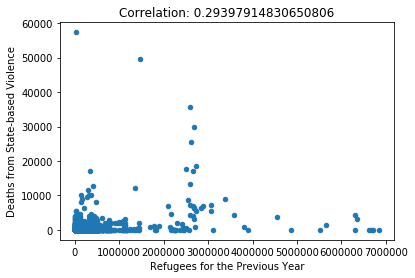

In [53]:
# Correlation between previous refugee counts and conflict for the current year

correlation = merged_df['Refugees_Lag'].corr(merged_df['state_deaths'])

# Create a scatter plot
merged_df.plot.scatter(x='Refugees_Lag', y='state_deaths')

# Add a title and labels to the plot
plt.title('Correlation: {}'.format(correlation))
plt.xlabel('Refugees for the Previous Year')
plt.ylabel('Deaths from State-based Violence')

# Display the plot
plt.show()


## Merging with Pre-Processed Data

In [149]:
prepross = pd.read_csv(parent_path + '/data/preprocessed_df.csv')

In [150]:
prepross.head(10)

,MonthYear,isocode,year,deaths,month_year,Country Name,deaths_all_intp_pop_pc,armedconf_intp_pop,past6,past12,...,num_regions,Adm1_Max,Adm1_Mean,Adm1_Median,share_state_deaths,share_nonstate_deaths,share_onesided_deaths,share_civilian_deaths,month_sin,month_cos
0,1970-01-01 00:00:00.000200001,AFG,2000,54.0,2000-01-01,Afghanistan,0.276314,True,0.276314,0.276314,...,32,6.403298e+02,6.029093e+02,602.123846,100.0,0.0,0.0,48.15,0.5,0.866025
1,1970-01-01 00:00:00.000200001,AGO,2000,36.0,2000-01-01,Angola,0.219592,True,0.219592,0.219592,...,20,6.128571e+01,2.868255e+01,26.900901,0.0,0.0,100.0,100.00,0.5,0.866025
2,1970-01-01 00:00:00.000200001,ALB,2000,0.0,2000-01-01,Albania,0.000000,False,0.000000,0.000000,...,14,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0,0.00,0.5,0.866025
3,1970-01-01 00:00:00.000200001,ARE,2000,0.0,2000-01-01,United Arab Emirates,0.000000,False,0.000000,0.000000,...,8,1.298701e-02,8.923573e-03,0.009028,0.0,0.0,0.0,0.00,0.5,0.866025
4,1970-01-01 00:00:00.000200001,ARG,2000,0.0,2000-01-01,Argentina,0.000000,False,0.000000,0.000000,...,19,2.648402e-10,3.310646e-11,0.000000,0.0,0.0,0.0,0.00,0.5,0.866025
5,1970-01-01 00:00:00.000200001,ARM,2000,0.0,2000-01-01,Armenia,0.000000,False,0.000000,0.000000,...,11,2.680412e-01,2.033795e-01,0.193939,0.0,0.0,0.0,0.00,0.5,0.866025
6,1970-01-01 00:00:00.000200001,ATG,2000,0.0,2000-01-01,Antigua and Barbuda,0.000000,False,0.000000,0.000000,...,1,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0,0.00,0.5,0.866025
7,1970-01-01 00:00:00.000200001,AUS,2000,0.0,2000-01-01,Australia,0.000000,False,0.000000,0.000000,...,9,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0,0.00,0.5,0.866025
8,1970-01-01 00:00:00.000200001,AUT,2000,0.0,2000-01-01,Austria,0.000000,False,0.000000,0.000000,...,9,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0,0.00,0.5,0.866025
9,1970-01-01 00:00:00.000200001,AZE,2000,0.0,2000-01-01,Azerbaijan,0.000000,False,0.000000,0.000000,...,28,5.183741e+01,8.988681e+00,0.407647,0.0,0.0,0.0,0.00,0.5,0.866025


In [151]:
# Retrieving the list of countries of origin and destination 
common_countries_origin = set(df['Country of origin (ISO)']).intersection(set(prepross['isocode']))
common_countries_destination = set(df['Country of asylum (ISO)']).intersection(set(prepross['isocode']))

# Aggregating refugee flows at country of origin level
df_origin_agg = df.groupby(['Country of origin (ISO)', 'Year'])['Total'].sum().reset_index()
df_origin_agg.rename(columns={'Total': 'RefugeesAnnual'}, inplace=True)

# Aggregating refugee flows at country of destination level
df_destination_agg = df.groupby(['Country of asylum (ISO)', 'Year'])['Total'].sum().reset_index()
df_destination_agg.rename(columns={'Total': 'RefugeesReceived'}, inplace=True)

# Merge aggregated refugee flows with prepross
df_wref = prepross.merge(df_origin_agg, left_on=['isocode', 'year'], right_on=['Country of origin (ISO)', 'Year'], how='left')
df_wref = df_wref.merge(df_destination_agg, left_on=['isocode', 'year'], right_on=['Country of asylum (ISO)', 'Year'], how='left')
df_wref.drop(['Country of origin (ISO)', 'Country of asylum (ISO)', 'Year_x', 'Year_y'], axis=1, inplace=True)

# Fill NAs before 2023 with 0
df_wref.loc[df_wref['year'] < 2023, ['RefugeesAnnual', 'RefugeesReceived']] = \
    df_wref.loc[df_wref['year'] < 2023, ['RefugeesAnnual', 'RefugeesReceived']].fillna(0)

# Set values to NA for non-January months
df_wref['month_year'] = pd.to_datetime(df_wref['month_year'], format='%Y-%m-%d')
df_wref.loc[df_wref['month_year'].dt.month != 1, 'RefugeesAnnual'] = np.nan
df_wref.loc[df_wref['month_year'].dt.month != 1, 'RefugeesReceived'] = np.nan

In [152]:
# Set 'isocode' and 'month_year' as the index
df_wref = df_wref.set_index(['isocode', 'month_year'])

# List of columns to interpolate
columns_to_interpolate = ['RefugeesAnnual', 'RefugeesReceived']

# Function to interpolate missing values within a group
def interpolate_group(group):
    group[columns_to_interpolate] = group[columns_to_interpolate].interpolate(method='linear')
    return group

# Apply interpolation within each country group
df_wref = df_wref.groupby('isocode').apply(interpolate_group)

# Reset the index
df_wref = df_wref.reset_index(drop=False)